In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def profile_to_img(graph_dir, output_dir, scale = 5000, resolution = 207, center = 103):
    """
    Convert x-y plot(profile of powder diffraction patterns) to ring-like images(with beam stop and bright spot).
    The function can only generate rings whose centers are on the diagonal (from top left to bottom right).
    Example:
    graph_dir = '/Users/anranxu/Desktop/ML/diffraction/0.2/0.2(3).txt'
    output_dir = '/Users/anranxu/Desktop/ML/diffraction_patterns/0.2/0.2(3).png'
    """
    xx, yy = np.mgrid[:resolution, :resolution]
    y = yy - center
    x = xx - center
    circle = ((x) ** 2 + (y) ** 2)
    new_circ = np.sqrt(circle)
    radius = []
    intensities = []
    with open(graph_dir, 'r') as file:
        lines = file.readlines()
        for line in lines:
            angle, I = line.split('\t')[0], line.split('\t')[1]
            angles = float(angle)/2
            angles = angles * np.pi/180
            intensity = float(I.strip('\n'))
            radius.append(scale* np.tan(angles))
            intensities.append(intensity)
    max_bright = max(intensities)
    width = 3
    real_line = y - 0.2*x # real_line is a num array
    beam_stop = (real_line>-width) & (real_line<width) & (y>0) #beam_stop is a T/F array
    bright_spot_inner_radius = 3.5
    bright_spot_outer_radius = 5
    bright_region = (new_circ > bright_spot_inner_radius) & (new_circ < bright_spot_outer_radius) & (beam_stop == 0)
    bright = bright_region*(2*max(intensities))
    base = np.zeros((resolution,resolution))
    j = 0
    prev_num = radius[0]
    for num in radius:
        donut = (new_circ <= num) & (new_circ > prev_num) & (beam_stop==0) & (new_circ > bright_spot_outer_radius)
        donut = donut*intensities[j]
        base = base + donut
        prev_num = num
        j+=1
    base = base + bright
    plt.figure(0, figsize = (7, 7))
    plt.imshow(base)
    plt.axis('off')
    plt.savefig(output_dir)

['/Users/anranxu/Desktop/ML/diffraction/0.0/0.0(1).txt', '/Users/anranxu/Desktop/ML/diffraction/0.0/0.0(2).txt', '/Users/anranxu/Desktop/ML/diffraction/0.0/0.0(3).txt', '/Users/anranxu/Desktop/ML/diffraction/0.0/0.0(4).txt']
['/Users/anranxu/Desktop/ML/diffraction_patterns/0.0/0.0(1).jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/0.0/0.0(2).jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/0.0/0.0(3).jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/0.0/0.0(4).jpg']
['/Users/anranxu/Desktop/ML/diffraction/1.1/1.1(1).txt', '/Users/anranxu/Desktop/ML/diffraction/1.1/1.1(2).txt', '/Users/anranxu/Desktop/ML/diffraction/1.1/1.1(3).txt', '/Users/anranxu/Desktop/ML/diffraction/1.1/1.1(4).txt']
['/Users/anranxu/Desktop/ML/diffraction_patterns/1.1/1.1(1).jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/1.1/1.1(2).jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/1.1/1.1(3).jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/1.1/1.1(4).jpg']
['/Users/anranxu/Desktop/ML/

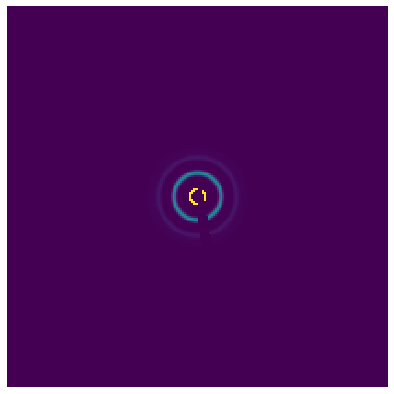

In [3]:
# create centered images
# [0.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
for i in [0.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
    direc = i
    direc_dir = '/Users/anranxu/Desktop/ML/diffraction/'
    graph_dir_list = []
    for i in [1, 2, 3, 4]:
        file_name = '{}/{}({}).txt'.format(direc, direc,i)
        graph_dir = direc_dir + file_name
        graph_dir_list.append(graph_dir)
    output = '/Users/anranxu/Desktop/ML/diffraction_patterns/'
    output_dir_list = []
    for i in [1, 2, 3, 4]:
        file_name = '{}/{}({}).jpg'.format(direc, direc,i)
        output_dir = output + file_name
        output_dir_list.append(output_dir)
    print(graph_dir_list)
    print(output_dir_list)
    for i in [1 , 2, 3, 4]:
        graph_dir = graph_dir_list[i-1]
        output_dir = output_dir_list[i-1]
        profile_to_img(graph_dir, output_dir, scale = 5000, resolution = 207, center = 103)

In [7]:
# create off-centered images
# direc_dir = '/Users/anranxu/Desktop/ML/diffraction/'
# direc = 1.0 # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.0]
# center = 90
# graph_dir_list = []
# for i in [1 , 2, 3, 4]:
#     file_name = '{}/{}({}).txt'.format(direc, direc,i)
#     graph_dir = direc_dir + file_name
#     graph_dir_list.append(graph_dir)
# output = '/Users/anranxu/Desktop/ML/diffraction_patterns/'
# output_dir_list = []
# for i in [1 , 2, 3, 4]:
#     file_name = '{}/{}({})_{}.jpg'.format(direc, direc,i, center)
#     output_dir = output + file_name
#     output_dir_list.append(output_dir)
# print(graph_dir_list)
# print(output_dir_list)

['/Users/anranxu/Desktop/ML/diffraction/1.0/1.0(1).txt', '/Users/anranxu/Desktop/ML/diffraction/1.0/1.0(2).txt', '/Users/anranxu/Desktop/ML/diffraction/1.0/1.0(3).txt', '/Users/anranxu/Desktop/ML/diffraction/1.0/1.0(4).txt']
['/Users/anranxu/Desktop/ML/diffraction_patterns/1.0/1.0(1)_90.jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/1.0/1.0(2)_90.jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/1.0/1.0(3)_90.jpg', '/Users/anranxu/Desktop/ML/diffraction_patterns/1.0/1.0(4)_90.jpg']


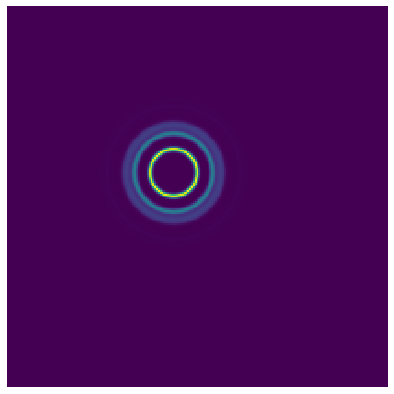

In [81]:
# for i in [1 , 2, 3, 4]:
#     graph_dir = graph_dir_list[i-1]
#     output_dir = output_dir_list[i-1]
#     profile_to_img(graph_dir, output_dir, center = center)

In [4]:
# create off-center and/or off-diagonal images
def profile_to_img_plus(graph_dir, output_dir, scale = 5000, resolution = 207, center1 = 103, center2 = 103):
    """
    Convert x-y plot(profile of powder diffraction patterns) to ring-like images.
    The function can generate rings whose centers are on the diagonal or off-diagonal.
    Example:
    graph_dir = '/Users/anranxu/Desktop/ML/diffraction/0.2/0.2(3).txt'
    output_dir = '/Users/anranxu/Desktop/ML/diffraction_patterns/0.2/0.2(3).png'
    """
    xx, yy = np.mgrid[:resolution, :resolution]
    x = xx - center1
    y = yy - center2
    circle = ((x) ** 2 + (y) ** 2)
    new_circ = np.sqrt(circle)
    radius = []
    intensities = []
    with open(graph_dir, 'r') as file:
        lines = file.readlines()
        for line in lines:
            angle, I = line.split('\t')[0], line.split('\t')[1]
            angles = float(angle)/2
            angles = angles * np.pi/180
            intensity = float(I.strip('\n'))
            radius.append(scale* np.tan(angles))
            intensities.append(intensity)
    max_bright = max(intensities)
    width = 3
    real_line = y - 0.2*x # real_line is a num array
    beam_stop = (real_line>-width) & (real_line<width) & (y>0) #beam_stop is a T/F array
    bright_spot_inner_radius = 3.5
    bright_spot_outer_radius = 5
    bright_region = (new_circ > bright_spot_inner_radius) & (new_circ < bright_spot_outer_radius) & (beam_stop == 0)
    bright = bright_region*(2*max_bright)
    base = np.zeros((resolution,resolution))
    j = 0
    prev_num = radius[0]
    for num in radius:
        donut = (new_circ <= num) & (new_circ > prev_num) & (beam_stop==0) & (new_circ > bright_spot_outer_radius)
        donut = donut*intensities[j]
        base = base + donut
        prev_num = num
        j+=1
    base = base + bright
    plt.figure(0, figsize = (7, 7))
    plt.imshow(base)
    plt.axis('off')
    plt.savefig(output_dir)

In [5]:
# create a list of (center1, center2)
center_list = np.random.randint(90,121, (25,2))
print(center_list)

[[ 95  98]
 [ 94 107]
 [108  98]
 [112 119]
 [ 91 109]
 [116 108]
 [ 99 101]
 [108  96]
 [100  91]
 [110 117]
 [115 119]
 [ 99 114]
 [118 119]
 [ 94  92]
 [107 118]
 [ 96 108]
 [ 93 100]
 [ 93  93]
 [110  95]
 [117 117]
 [ 93 108]
 [108 114]
 [102 104]
 [ 99 103]
 [ 91 114]]


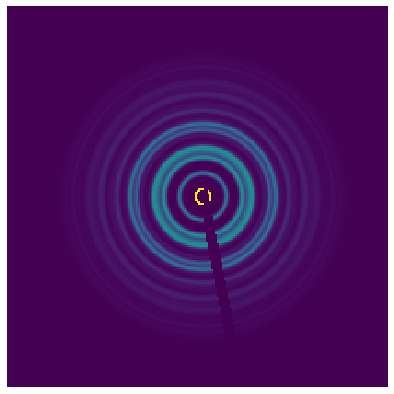

In [16]:
#test
direc = 0.1
direc_dir = '/Users/anranxu/Desktop/ML/diffraction/'
graph_dir_list = []
for i in [1 , 2, 3, 4]:
    file_name = '{}/{}({}).txt'.format(direc, direc,i)
    graph_dir = direc_dir + file_name
    graph_dir_list.append(graph_dir)
for index in center_list:
    center1, center2 = index
    output = '/Users/anranxu/Desktop/ML/diffraction_patterns/'
    output_dir_list = []
    for i in [1 , 2, 3, 4]:
        file_name = '{}/{}({})_({},{}).jpg'.format(direc, direc,i, center1, center2)
        output_dir = output + file_name
        output_dir_list.append(output_dir)
    for i in [1 , 2, 3, 4]:
        graph_dir = graph_dir_list[i-1]
        output_dir = output_dir_list[i-1]
        profile_to_img_plus(graph_dir, output_dir, center1 = center1, center2 = center2)

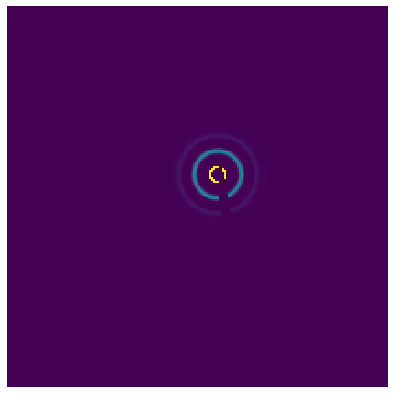

In [6]:
for i in [0.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
    direc = i
    direc_dir = '/Users/anranxu/Desktop/ML/diffraction/'
    graph_dir_list = []
    for i in [1 , 2, 3, 4]:
        file_name = '{}/{}({}).txt'.format(direc, direc,i)
        graph_dir = direc_dir + file_name
        graph_dir_list.append(graph_dir)
    for index in center_list:
        center1, center2 = index
        output = '/Users/anranxu/Desktop/ML/diffraction_patterns/'
        output_dir_list = []
        for i in [1 , 2, 3, 4]:
            file_name = '{}/{}({})_({},{}).jpg'.format(direc, direc,i, center1, center2)
            output_dir = output + file_name
            output_dir_list.append(output_dir)
        for i in [1 , 2, 3, 4]:
            graph_dir = graph_dir_list[i-1]
            output_dir = output_dir_list[i-1]
            profile_to_img_plus(graph_dir, output_dir, center1 = center1, center2 = center2)

In [46]:
import os
import random
from os import listdir
# divide diffraction_patterns into training set and validation set one by one
direc = 1.0 # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
direc_path = '/Users/anranxu/Desktop/ML/diffraction_patterns/{}'.format(direc)
file_list = listdir(direc_path)
random.shuffle(file_list)
# file_list.remove('.DS_Store')
print(file_list)
len(file_list)

['1.0(3)_(100,108).jpg', '1.0(1)_(116,111).jpg', '1.0(4)_(91,96).jpg', '1.0(2)_(110,112).jpg', '1.0(2)_(114,114).jpg', '1.0(2)_(96,113).jpg', '1.0(1)_(105,117).jpg', '1.0(3)_(107,96).jpg', '1.0(2)_(109,107).jpg', '1.0(3)_(120,101).jpg', '1.0(3)_(99,119).jpg', '1.0(1)_(96,113).jpg', '1.0(2)_(99,99).jpg', '1.0(1)_(109,111).jpg', '1.0(3)_(98,95).jpg', '1.0(2)_(103,106).jpg', '1.0(2)_(116,111).jpg', '1.0(4)_(101,114).jpg', '1.0(1)_(106,110).jpg', '1.0(1)_(114,114).jpg', '1.0(1)_(109,107).jpg', '1.0(1)_(110,112).jpg', '1.0(1)_(99,99).jpg', '1.0(4)_(99,119).jpg', '1.0(2)_(109,111).jpg', '1.0(3)_(111,120).jpg', '1.0(1)_(115,98).jpg', '1.0(4)_(111,120).jpg', '1.0(2)_(91,96).jpg', '1.0(4)_(100,108).jpg', '1.0(4)_(108,92).jpg', '1.0(3)_(110,112).jpg', '1.0(3)_(111,106).jpg', '1.0(1)_(96,111).jpg', '1.0(3)_(99,99).jpg', '1.0(4)_(99,102).jpg', '1.0(1)_(111,120).jpg', '1.0(3)_(112,102).jpg', '1.0(1)_(110,102).jpg', '1.0(2)_(115,98).jpg', '1.0(2)_(120,101).jpg', '1.0(1)_(99,119).jpg', '1.0(4)_(111,1

104

In [8]:
# os.mkdir('/Users/anranxu/Desktop/ML/training')
# os.mkdir('/Users/anranxu/Desktop/ML/validation')
# train = '/Users/anranxu/Desktop/ML/training'
# validation = '/Users/anranxu/Desktop/ML/validation'
# for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
#     trains = train + '/{}'.format(i)
#     val = validation + '/{}'.format(i)
#     os.mkdir(trains)
#     os.mkdir(val)
    
def deviding_images(file_list, training_destination, validation_destination, direc, persentage = 0.2):
    """
    Put images to training set and validation set directories. Meanwhile, convert rgb to greyscale.
    
    Precondition: file_list is shuffled.
    """
    file = '/Users/anranxu/Desktop/ML/diffraction_patterns/{}/'.format(direc)
    num = len(file_list)
    val_num = int(num//(1/persentage))
    val_list = file_list[:val_num]
    train_list = file_list[val_num:]
    for f in val_list:
        f_dir = file + f
#         shutil.copy(f, validation_destination)
        img = Image.open(f_dir)
        imgGray = img.convert('L')
        imgGray.save(validation_destination+f)
    for f in train_list:
        f_dir = file +f
#         shutil.copy(f, training_destination)
        img = Image.open(f_dir)
        imgGray = img.convert('L')
        imgGray.save(training_destination+f)

In [48]:
training_destination = '/Users/anranxu/Desktop/ML/training/{}/'.format(direc)
validation_destination = '/Users/anranxu/Desktop/ML/validation/{}/'.format(direc)
deviding_images(file_list, training_destination, validation_destination, direc, persentage = 0.2)

In [7]:
# os.mkdir('/Users/anranxu/Desktop/ML/training')
# os.mkdir('/Users/anranxu/Desktop/ML/validation')
# train = '/Users/anranxu/Desktop/ML/training'
# validation = '/Users/anranxu/Desktop/ML/validation'
# for i in [0.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
#     trains = train + '/{}'.format(i)
#     val = validation + '/{}'.format(i)
#     os.mkdir(trains)
#     os.mkdir(val)

In [2]:
# import os
# patterns = '/Users/anranxu/Desktop/ML/diffraction_patterns'
# for i in [0.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
#     pattern = patterns + '/{}'.format(i)
#     os.mkdir(pattern)

In [9]:
import os
import random
from os import listdir
for i in [0.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
    # divide diffraction_patterns into training set and validation set one by one
    direc = i # [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    direc_path = '/Users/anranxu/Desktop/ML/diffraction_patterns/{}'.format(direc)
    file_list = listdir(direc_path)
    random.shuffle(file_list)
    # file_list.remove('.DS_Store')
    print(file_list)
    len(file_list)
    training_destination = '/Users/anranxu/Desktop/ML/training/{}/'.format(direc)
    validation_destination = '/Users/anranxu/Desktop/ML/validation/{}/'.format(direc)
    deviding_images(file_list, training_destination, validation_destination, direc, persentage = 0.2)

['0.0(4)_(118,119).jpg', '0.0(1).jpg', '0.0(2)_(100,91).jpg', '0.0(1)_(110,95).jpg', '0.0(4)_(94,107).jpg', '0.0(3)_(99,103).jpg', '0.0(2)_(99,101).jpg', '0.0(4).jpg', '0.0(4)_(108,114).jpg', '0.0(4)_(116,108).jpg', '0.0(1)_(94,92).jpg', '0.0(3)_(94,107).jpg', '0.0(3)_(102,104).jpg', '0.0(1)_(108,114).jpg', '0.0(1)_(93,100).jpg', '0.0(2)_(94,92).jpg', '0.0(4)_(91,109).jpg', '0.0(2)_(108,96).jpg', '0.0(1)_(108,98).jpg', '0.0(1)_(96,108).jpg', '0.0(2)_(94,107).jpg', '0.0(3)_(99,114).jpg', '0.0(4)_(102,104).jpg', '0.0(1)_(93,93).jpg', '0.0(2)_(112,119).jpg', '0.0(3)_(116,108).jpg', '0.0(1)_(110,117).jpg', '0.0(1)_(91,109).jpg', '0.0(3)_(96,108).jpg', '0.0(2)_(91,109).jpg', '0.0(2)_(110,95).jpg', '0.0(4)_(108,98).jpg', '0.0(3).jpg', '0.0(4)_(110,117).jpg', '0.0(4)_(93,108).jpg', '0.0(3)_(100,91).jpg', '0.0(2)_(107,118).jpg', '0.0(4)_(94,92).jpg', '0.0(4)_(99,114).jpg', '0.0(2)_(93,93).jpg', '0.0(4)_(108,96).jpg', '0.0(3)_(107,118).jpg', '0.0(3)_(91,109).jpg', '0.0(1)_(116,108).jpg', '0.0(1

['1.4(1)_(116,108).jpg', '1.4(2)_(99,101).jpg', '1.4(4)_(93,100).jpg', '1.4(1)_(100,91).jpg', '1.4(4)_(108,114).jpg', '1.4(1)_(108,98).jpg', '1.4(4)_(108,96).jpg', '1.4(3)_(112,119).jpg', '1.4(4)_(115,119).jpg', '1.4(1).jpg', '1.4(3)_(93,108).jpg', '1.4(4)_(108,98).jpg', '1.4(1)_(94,92).jpg', '1.4(1)_(93,93).jpg', '1.4(3)_(94,92).jpg', '1.4(4)_(99,101).jpg', '1.4(3)_(94,107).jpg', '1.4(2)_(94,107).jpg', '1.4(1)_(110,117).jpg', '1.4(1)_(99,114).jpg', '1.4(1)_(115,119).jpg', '1.4(3)_(99,101).jpg', '1.4(4)_(91,109).jpg', '1.4(2)_(102,104).jpg', '1.4(3)_(110,95).jpg', '1.4(1)_(91,109).jpg', '1.4(3)_(93,100).jpg', '1.4(2)_(93,100).jpg', '1.4(4)_(94,92).jpg', '1.4(2)_(93,108).jpg', '1.4(1)_(95,98).jpg', '1.4(3)_(108,98).jpg', '1.4(1)_(108,114).jpg', '1.4(3)_(118,119).jpg', '1.4(3)_(91,109).jpg', '1.4(1)_(107,118).jpg', '1.4(2)_(118,119).jpg', '1.4(2)_(107,118).jpg', '1.4(1)_(96,108).jpg', '1.4(1)_(112,119).jpg', '1.4(1)_(94,107).jpg', '1.4(4)_(93,93).jpg', '1.4(3)_(91,114).jpg', '1.4(1)_(117

['1.8(4).jpg', '1.8(2)_(91,114).jpg', '1.8(3)_(110,95).jpg', '1.8(3)_(91,114).jpg', '1.8(3)_(93,108).jpg', '1.8(1)_(108,96).jpg', '1.8(1)_(115,119).jpg', '1.8(4)_(99,101).jpg', '1.8(2)_(91,109).jpg', '1.8(4)_(93,93).jpg', '1.8(1)_(118,119).jpg', '1.8(2)_(117,117).jpg', '1.8(1)_(99,114).jpg', '1.8(4)_(91,109).jpg', '1.8(4)_(115,119).jpg', '1.8(4)_(91,114).jpg', '1.8(3)_(91,109).jpg', '1.8(2)_(94,92).jpg', '1.8(2)_(93,93).jpg', '1.8(1)_(93,100).jpg', '1.8(4)_(99,114).jpg', '1.8(3)_(117,117).jpg', '1.8(4)_(116,108).jpg', '1.8(3).jpg', '1.8(2)_(115,119).jpg', '1.8(4)_(94,107).jpg', '1.8(1)_(108,98).jpg', '1.8(4)_(108,114).jpg', '1.8(2)_(100,91).jpg', '1.8(4)_(107,118).jpg', '1.8(1)_(102,104).jpg', '1.8(2)_(99,114).jpg', '1.8(3)_(99,101).jpg', '1.8(3)_(94,107).jpg', '1.8(4)_(108,98).jpg', '1.8(3)_(108,114).jpg', '1.8(4)_(100,91).jpg', '1.8(2)_(94,107).jpg', '1.8(2)_(95,98).jpg', '1.8(1)_(99,101).jpg', '1.8(2)_(93,108).jpg', '1.8(1)_(93,108).jpg', '1.8(4)_(112,119).jpg', '1.8(2)_(118,119).jp